In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from numpy.linalg import norm
import regression as reg
from data import funcs 
import template as example
import gradient_descent as descent

In [20]:
def bfgs(func, grad, init_point, eps=1e-4, max_iter=100):
    point = init_point      # row
    H = np.eye(len(point))  # matrix
    E = np.eye(len(point))  # matrix
    
    for it in range(max_iter):
        g = grad(point)  # row
        p = -H.dot(g)    # row
        
        if norm(g) < eps:
            break
        
        # too slow
        # sol = solve(simplify(func(a * p + point)).diff(), a)
        # alpha = float(sol[0])
            
        alpha = descent.find_wolfe_lr(func, grad, point, p, 100)
        
        new_point = point + alpha * p # row + const * row = row
        new_grad = grad(new_point)    # row
        
        s = alpha * p     # scalar * row = row
        y = new_grad - g  # row - row = row
        
        rho = 1 / (y @ s) # scalar
        
        s_2d = np.atleast_2d(s).transpose() # col
        y_2d = np.atleast_2d(y).transpose() # col
        H = ((E - rho * s_2d.dot(y_2d.transpose()))
             .dot(H)
             .dot(E - rho * y_2d.dot(s_2d.transpose())) + rho * s_2d.dot(s_2d.transpose()))
        
        point += s
        
    return point

In [21]:
def f(point):
    x, y = point[0], point[1]
    return x ** 2 - x * y + y ** 2 + 9 * x - 6 * y + 20

def grad(point):
    x, y = point[0], point[1]
    return np.array([[2 * x - y + 9], [-x + 2 * y - 6]])

In [22]:
def create_regression_test(func, jacobian, regression, grad):
    def run(x: np.ndarray,
            y: np.ndarray,
            st: np.ndarray,
            eps: float,
            max_iter: int):
        r = regression(func, x, y)
        F = lambda betta: sum(r(betta) ** 2)
        return bfgs(F, grad(x, jacobian, r), st, eps, max_iter)

    return run

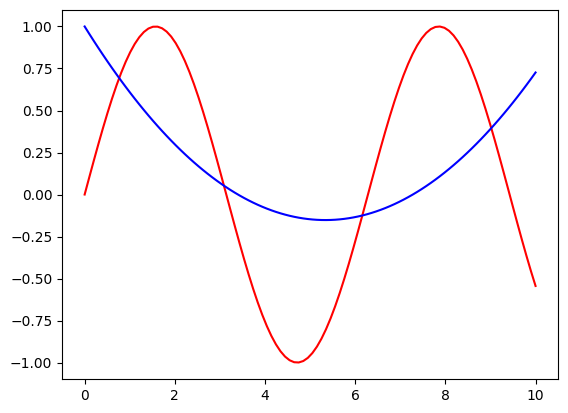

In [23]:
x0 = np.array([10., 2.])
epsilon = 0.001

start = 0
end = 10
steps = 100
test_x, test_y = example.generate_test(np.sin, start, end, steps)

func, jac = funcs["square"]
test = create_regression_test(func, jac, reg.regression, reg.grad)

betta = test(test_x, test_y, x0, 1e-4, 10000)

X = np.linspace(start, end, steps)
Y = func(X)(betta)

example.show(test_x, test_y, X, Y)

In [24]:
betta

array([ 0.04041246, -0.43150956])